In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('data.csv',encoding='utf-8')

In [3]:
df = data.copy()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  bool   
 10  wants_preferred_seat   50000 non-null  bool   
 11  wants_in_flight_meals  50000 non-null  bool   
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  bool   
dtypes: bool(4), float64(1), int64(5), object(4)
memory usa

In [5]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [7]:
df.shape

(50000, 14)

### About the Columns
- 'num_passengers': Represents the number of passengers on a flight.
-'sales_channel': Indicates the channel through which the flight was booked, such as online, travel agent, or direct booking.

- 'trip_type': Indicates the type of trip, such as one-way or round-trip.

- 'purchase_lead': Represents the time gap between booking and the flight date.

- 'length_of_stay': Indicates the duration of the passenger's stay at the destination.

- 'flight_hour': Represents the hour of the day when the flight departs.

- 'flight_day': Indicates the day of the week when the flight departs.

- 'route': Specifies the flight route or path from origin to destination.

- 'booking_origin': Indicates the location or source where the booking was made.

- 'wants_extra_baggage': A binary indicator of whether a passenger wants extra baggage.

- 'wants_preferred_seat': A binary indicator of whether a passenger wants a preferred seat.

- 'wants_in_flight_meals': A binary indicator of whether a passenger wants in-flight meals.

- 'flight_duration': Represents the duration of the flight in hours.

- 'booking_complete': A binary flag indicating whether the booking process was completed.

In [8]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [68]:
df.duplicated().any()
df = df.drop_duplicates(inplace= False)

In [69]:
null =100 *(df.isna().sum() /df.shape[0])
null

num_passengers           0.0
sales_channel            0.0
trip_type                0.0
purchase_lead            0.0
length_of_stay           0.0
flight_hour              0.0
flight_day               0.0
route                    0.0
booking_origin           0.0
wants_extra_baggage      0.0
wants_preferred_seat     0.0
wants_in_flight_meals    0.0
flight_duration          0.0
booking_complete         0.0
dtype: float64

In [9]:
df.flight_day.unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [10]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [23]:
columns_to_convert = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals','booking_complete']
df[columns_to_convert] = df[columns_to_convert].astype(bool)

In [22]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [11]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [25]:

from scipy.stats import skew, kurtosis

# Assuming you have a DataFrame named 'df' with numerical columns

def get_simple_stats(df):
    stats_dict = {'Statistics': ['Mean', 'Median', 'Mode', 'Min', 'Max', 'Range', 'Variance', 'Standard deviation', 'Skewness', 'Kurtosis']}
    
    for column in df.select_dtypes(include=[np.number]).columns:
        stats_dict[column] = [
            df[column].mean(),
            df[column].median(),
            df[column].mode().iloc[0],
            df[column].min(),
            df[column].max(),
            df[column].max() - df[column].min(),
            df[column].var(),
            df[column].std(),
            skew(df[column]),
            kurtosis(df[column])
        ]
    
    simple_stats_df = pd.DataFrame(stats_dict)
    return simple_stats_df

# Example usage:
# Replace 'df' with your actual DataFrame
simple_stats = get_simple_stats(df)
simple_stats


,Statistics,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration
0,Mean,1.591240,84.940480,23.044560,9.066340,3.814420,7.277561
1,Median,1.000000,51.000000,17.000000,9.000000,4.000000,7.570000
2,Mode,1.000000,1.000000,6.000000,8.000000,1.000000,8.830000
3,Min,1.000000,0.000000,0.000000,0.000000,1.000000,4.670000
4,Max,9.000000,867.000000,778.000000,23.000000,7.000000,9.500000
5,Range,8.000000,867.000000,778.000000,23.000000,6.000000,4.830000
6,Variance,1.040736,8181.451806,1148.374182,29.296885,3.971219,2.240599
7,Standard deviation,1.020165,90.451378,33.887670,5.412660,1.992792,1.496863
8,Skewness,2.690828,1.652986,5.274584,0.396611,0.134622,-0.360069
9,Kurtosis,10.061005,2.486334,48.805237,-0.302528,-1.204455,-1.373910


In [38]:
simple_stats.columns

Index(['Statistics', 'num_passengers', 'purchase_lead', 'length_of_stay',
       'flight_hour', 'flight_day', 'flight_duration'],
      dtype='object')

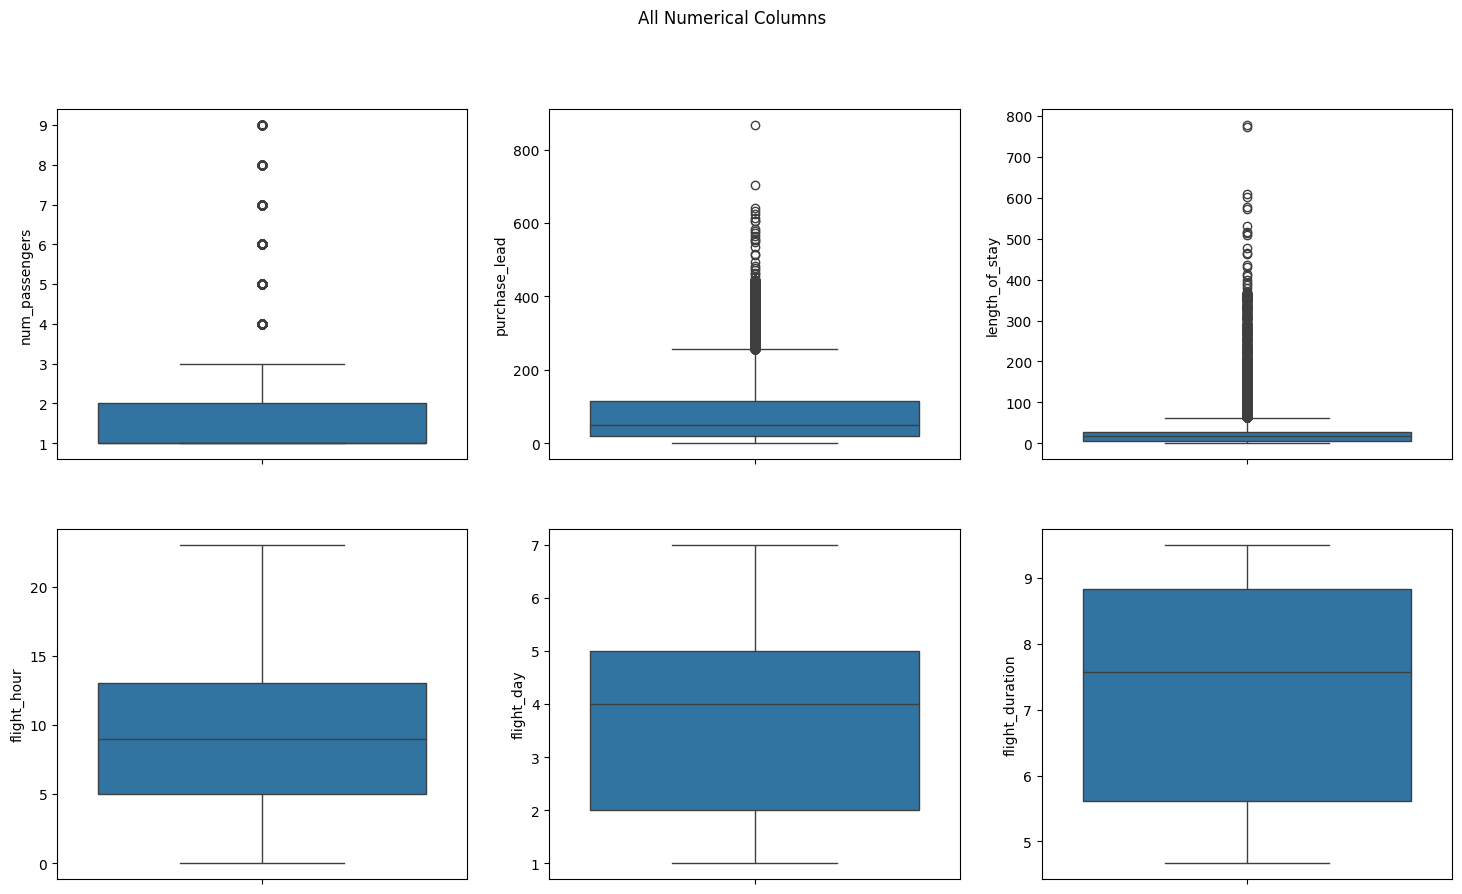

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('All Numerical Columns')

sns.boxplot(ax=axes[0, 0], data=df['num_passengers'] )
sns.boxplot(ax=axes[0, 1], data=df['purchase_lead'] )
sns.boxplot(ax=axes[0, 2], data=df['length_of_stay'])
sns.boxplot(ax=axes[1, 0], data=df['flight_hour'])
sns.boxplot(ax=axes[1, 1], data=df['flight_day'])
sns.boxplot(ax=axes[1, 2], data=df['flight_duration'])
plt.show()


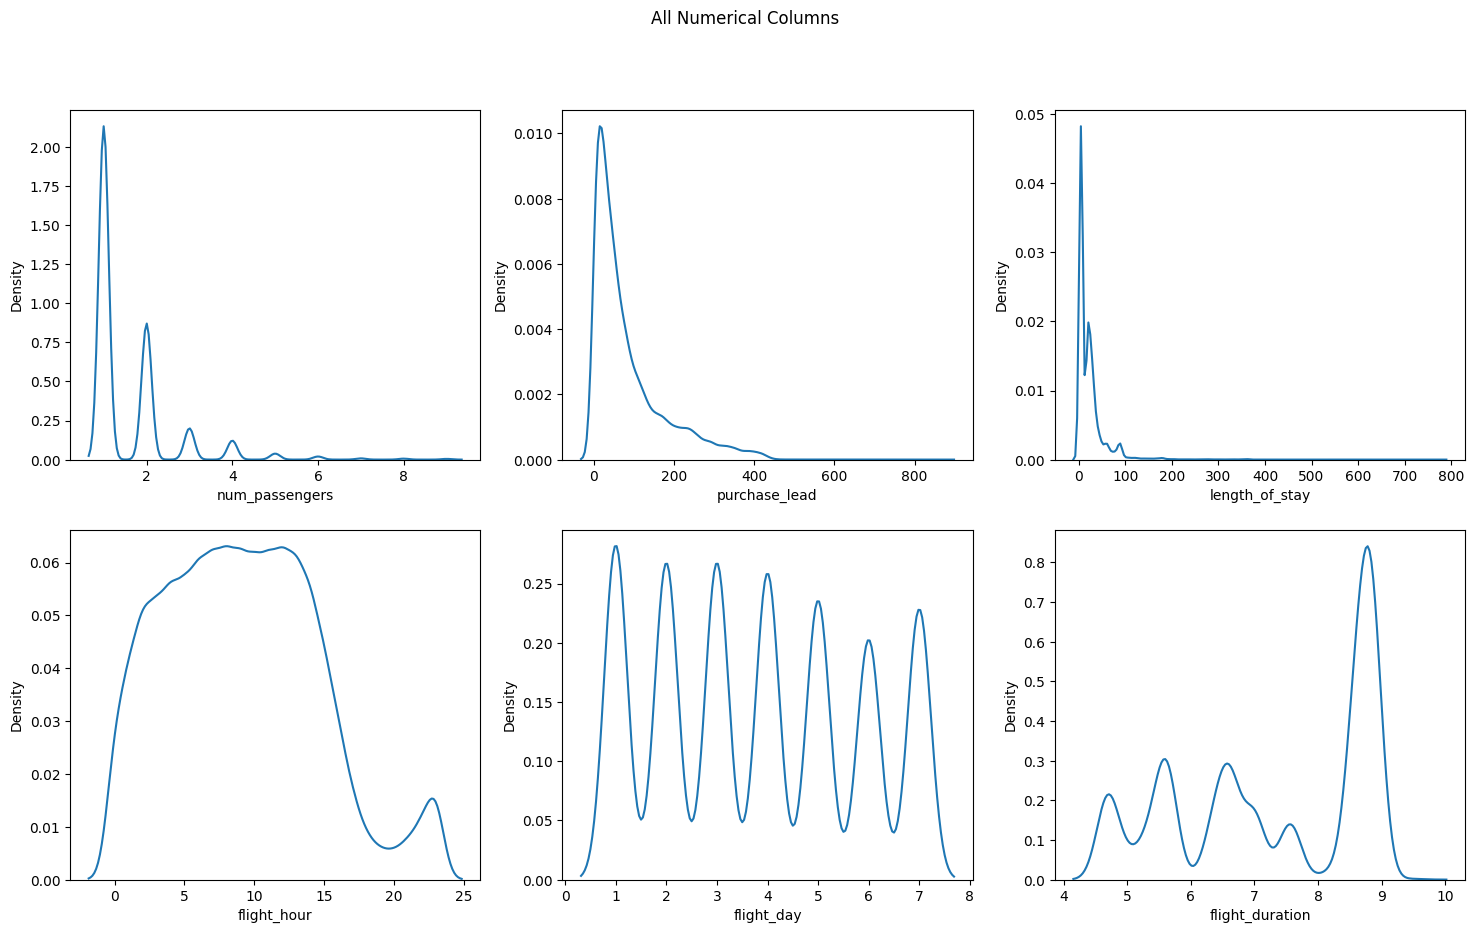

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('All Numerical Columns')

sns.kdeplot(ax=axes[0, 0], data=df['num_passengers'] )
sns.kdeplot(ax=axes[0, 1], data=df['purchase_lead'] )
sns.kdeplot(ax=axes[0, 2], data=df['length_of_stay'])
sns.kdeplot(ax=axes[1, 0], data=df['flight_hour'])
sns.kdeplot(ax=axes[1, 1], data=df['flight_day'])
sns.kdeplot(ax=axes[1, 2], data=df['flight_duration'])
plt.show()


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  bool   
 10  wants_preferred_seat   50000 non-null  bool   
 11  wants_in_flight_meals  50000 non-null  bool   
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  bool   
dtypes: bool(4), float64(1), int64(5), object(4)
memory usa

In [30]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,True,False,False,5.52,False
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,False,False,False,5.52,False
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,True,True,False,5.52,False
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,False,False,True,5.52,False
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,True,False,True,5.52,False


In [31]:
df.sales_channel.unique()

array(['Internet', 'Mobile'], dtype=object)

In [32]:
df.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [34]:
df.booking_origin.unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'R�union', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

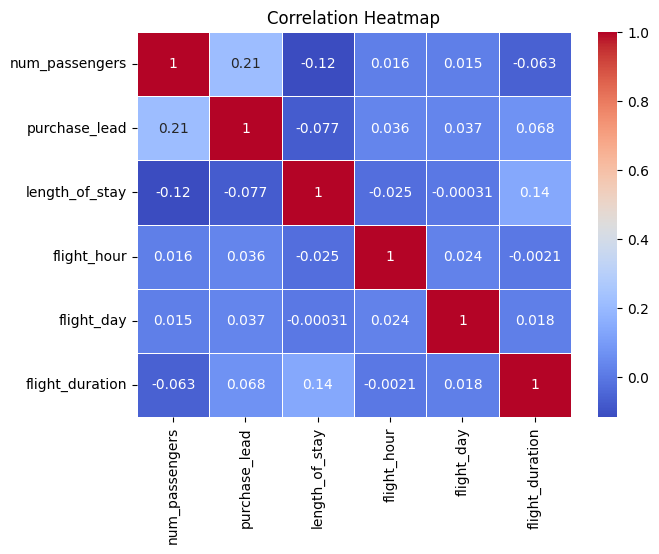

In [44]:
columns_to_correlate = [
    'num_passengers', 'purchase_lead', 'length_of_stay',
    'flight_hour', 'flight_day', 'flight_duration'
]

correlation_matrix = df[columns_to_correlate].corr()


plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")

plt.show()

<Axes: xlabel='num_passengers', ylabel='purchase_lead'>

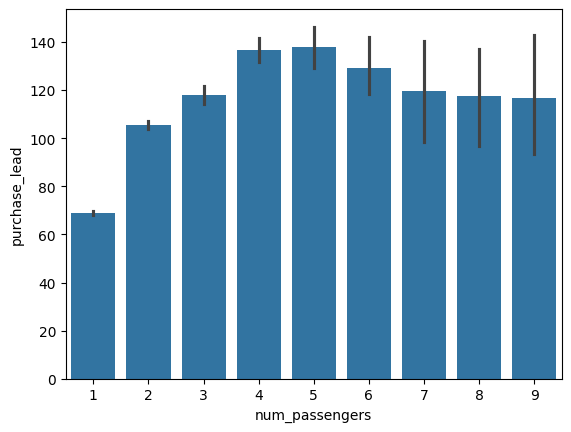

In [49]:
sns.barplot(data=df,x='num_passengers',y='purchase_lead')

<Axes: xlabel='flight_duration', ylabel='length_of_stay'>

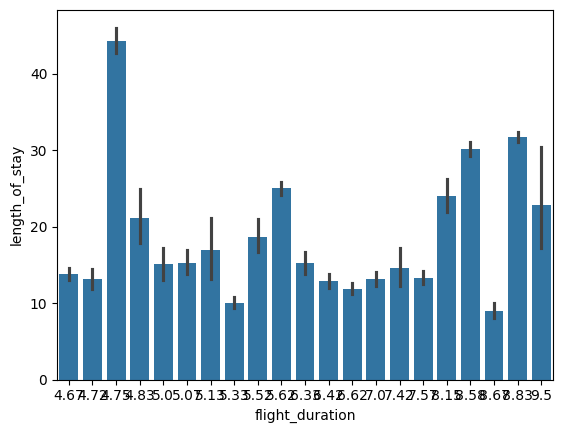

In [59]:
sns.barplot(data=df,x='flight_duration',y='length_of_stay')

In [60]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

True

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,True,False,False,5.52,False
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,False,False,False,5.52,False
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,True,True,False,5.52,False
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,False,False,True,5.52,False
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,True,False,True,5.52,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,True,False,True,5.62,False
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,False,False,False,5.62,False
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,False,False,True,5.62,False
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,True,False,True,5.62,False


In [70]:
df2 = pd.get_dummies(df, columns=['sales_channel']) # dummy variables for the sales channel column
df2 = pd.get_dummies(df2, columns=['trip_type']) # dummy variables for the trip_type column
df2.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,True,False,False,5.52,False,True,False,False,False,True
1,1,112,20,3,6,AKLDEL,New Zealand,False,False,False,5.52,False,True,False,False,False,True
2,2,243,22,17,3,AKLDEL,India,True,True,False,5.52,False,True,False,False,False,True
3,1,96,31,4,6,AKLDEL,New Zealand,False,False,True,5.52,False,True,False,False,False,True
4,2,68,22,15,3,AKLDEL,India,True,False,True,5.52,False,True,False,False,False,True


In [71]:
df2=df2.drop(['num_passengers','route','booking_origin'], axis=1) #dropping unncessary columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purchase_lead           49281 non-null  int64  
 1   length_of_stay          49281 non-null  int64  
 2   flight_hour             49281 non-null  int64  
 3   flight_day              49281 non-null  int64  
 4   wants_extra_baggage     49281 non-null  bool   
 5   wants_preferred_seat    49281 non-null  bool   
 6   wants_in_flight_meals   49281 non-null  bool   
 7   flight_duration         49281 non-null  float64
 8   booking_complete        49281 non-null  bool   
 9   sales_channel_Internet  49281 non-null  bool   
 10  sales_channel_Mobile    49281 non-null  bool   
 11  trip_type_CircleTrip    49281 non-null  bool   
 12  trip_type_OneWay        49281 non-null  bool   
 13  trip_type_RoundTrip     49281 non-null  bool   
dtypes: bool(9), float64(1), int64(4)
memory usa

In [87]:
x = df2.drop(columns=['booking_complete'])
y = df2['booking_complete']

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
lr = LogisticRegression(solver='liblinear',max_iter=1000)

In [92]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [93]:

accuracy = lr.score(X_test,y_test)
print("Accuracy of Logistic Regression : {:.2f}%".format(accuracy*100))


Accuracy of Logistic Regression : 85.00%


In [94]:
k = 5  # You can choose a different number of folds
scores = cross_val_score(lr, X, y, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print("Mean Accuracy:", mean_score)
print("Standard Deviation:", std_score)

Cross-validation scores: [0.84995435 0.85004058 0.85004058 0.85004058 0.85004058]
Mean Accuracy: 0.8500233369653578
Standard Deviation: 3.4494900453108106e-05


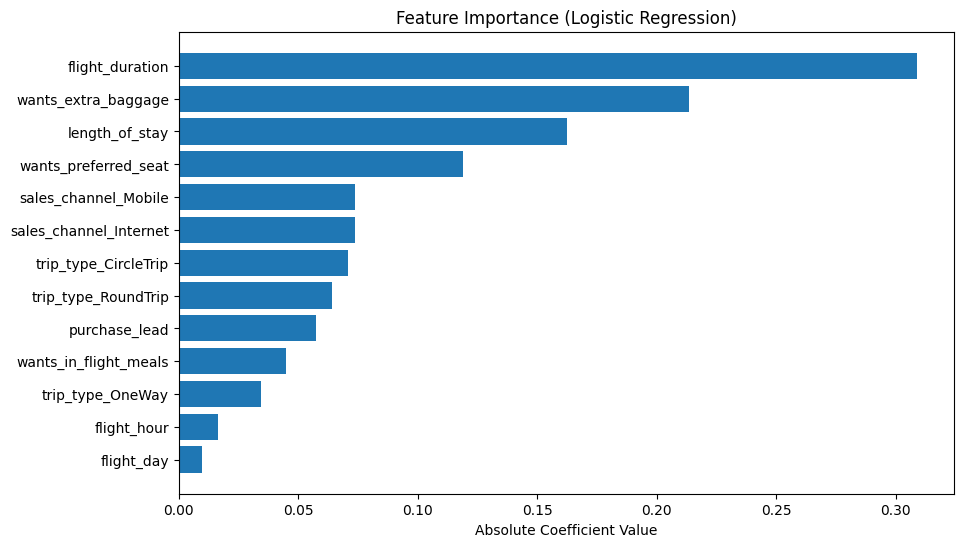

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a trained logistic regression model called 'model'
# and X_train contains your training feature matrix

# Get the coefficients from the logistic regression model
coefficients = lr.coef_[0]

# Calculate the absolute magnitude of coefficients
absolute_coefficients = np.abs(coefficients)

# Define feature names manually or access them from wherever you defined them
feature_names = ['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'sales_channel_Internet', 'sales_channel_Mobile',
       'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip']  # Replace with your actual feature names

# Sort feature names by absolute coefficient values (importance)
sorted_feature_names = [x for _, x in sorted(zip(absolute_coefficients, feature_names), reverse=True)]

# Sort the coefficients accordingly
sorted_coefficients = np.sort(absolute_coefficients)[::-1]

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_coefficients, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()
